In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import glob
from sklearn import preprocessing

In [2]:
files = glob.glob('*csv')
files

['Meteorite_Landings.csv',
 'GLC03122015.csv',
 'Fireball_And_Bolide_Reports.csv',
 'Near-Earth_Comets_-_Orbital_Elements.csv']

In [3]:
df = [pd.read_csv(element) for element in files]

In [4]:
df[2]
df[2].head()

,Date/Time - Peak Brightness (UT),Latitude (Deg),Longitude (Deg),Altitude (km),Velocity (km/s),Velocity Components (km/s): vx,Velocity Components (km/s): vy,Velocity Components (km/s): vz,Total Radiated Energy (J),Calculated Total Impact Energy (kt)
0,11/21/2009 08:53:00 PM,22.0S,29.2E,38.0,32.1,3.0,-17.0,-27.0,10000000000000,18.00
1,01/09/2015 10:41:11 AM,2.0N,28.8E,36.0,NaN,-10.7,-7.6,11.6,139000000000,0.41
2,05/16/2014 12:42:48 PM,44.2S,176.2W,44.0,NaN,14.4,4.6,6.5,309000000000,0.82
3,08/23/2014 06:29:41 AM,61.7S,132.6E,22.2,16.2,-2.3,5.7,16.5,3820000000000,7.60
4,12/12/2014 06:48:11 AM,33.5N,144.9E,26.3,NaN,11.5,-2.8,-2.2,33000000000,0.11


In [5]:
#North is + South is -, West is -, East is +
d_pal = { 'S': -1, 'N': +1, 'W':-1, 'E': +1}

In [6]:
loc_eig = df[2].iloc[:, 1:]
loc_eig = loc_eig.drop('Total Radiated Energy (J)', axis =1 )
loc_eig = loc_eig.drop('Velocity (km/s)', axis =1 )
loc_eig.head()

,Latitude (Deg),Longitude (Deg),Altitude (km),Velocity Components (km/s): vx,Velocity Components (km/s): vy,Velocity Components (km/s): vz,Calculated Total Impact Energy (kt)
0,22.0S,29.2E,38.0,3.0,-17.0,-27.0,18.00
1,2.0N,28.8E,36.0,-10.7,-7.6,11.6,0.41
2,44.2S,176.2W,44.0,14.4,4.6,6.5,0.82
3,61.7S,132.6E,22.2,-2.3,5.7,16.5,7.60
4,33.5N,144.9E,26.3,11.5,-2.8,-2.2,0.11


In [7]:
loc_eig['Latitude (Deg)'] = loc_eig['Latitude (Deg)'].apply(lambda a: d_pal[a[-1]] * float(a[:-1]))
loc_eig['Longitude (Deg)'] = loc_eig['Longitude (Deg)'].apply(lambda a: d_pal[a[-1]] * float(a[:-1]))
loc_eig.head()

,Latitude (Deg),Longitude (Deg),Altitude (km),Velocity Components (km/s): vx,Velocity Components (km/s): vy,Velocity Components (km/s): vz,Calculated Total Impact Energy (kt)
0,-22.0,29.2,38.0,3.0,-17.0,-27.0,18.00
1,2.0,28.8,36.0,-10.7,-7.6,11.6,0.41
2,-44.2,-176.2,44.0,14.4,4.6,6.5,0.82
3,-61.7,132.6,22.2,-2.3,5.7,16.5,7.60
4,33.5,144.9,26.3,11.5,-2.8,-2.2,0.11


In [8]:
loc_eig = loc_eig.drop(23, axis = 0)

In [9]:
loc_eig = loc_eig.fillna(loc_eig.mean())
loc_eig.head()

,Latitude (Deg),Longitude (Deg),Altitude (km),Velocity Components (km/s): vx,Velocity Components (km/s): vy,Velocity Components (km/s): vz,Calculated Total Impact Energy (kt)
0,-22.0,29.2,38.0,3.0,-17.0,-27.0,18.00
1,2.0,28.8,36.0,-10.7,-7.6,11.6,0.41
2,-44.2,-176.2,44.0,14.4,4.6,6.5,0.82
3,-61.7,132.6,22.2,-2.3,5.7,16.5,7.60
4,33.5,144.9,26.3,11.5,-2.8,-2.2,0.11


In [10]:
x = loc_eig.iloc[:, :].values

In [11]:
#min_max_scaler = preprocessing.MinMaxScaler()
#x_scaled = min_max_scaler.fit_transform(x)

In [12]:
x.shape

(91, 7)

In [13]:
c = np.dot(x.T, x)

In [14]:
c.shape

(7, 7)

In [15]:
[U, S, V] = np.linalg.svd(c)

In [16]:
#PCA Space
Z = np.dot(x, U[:, :2])

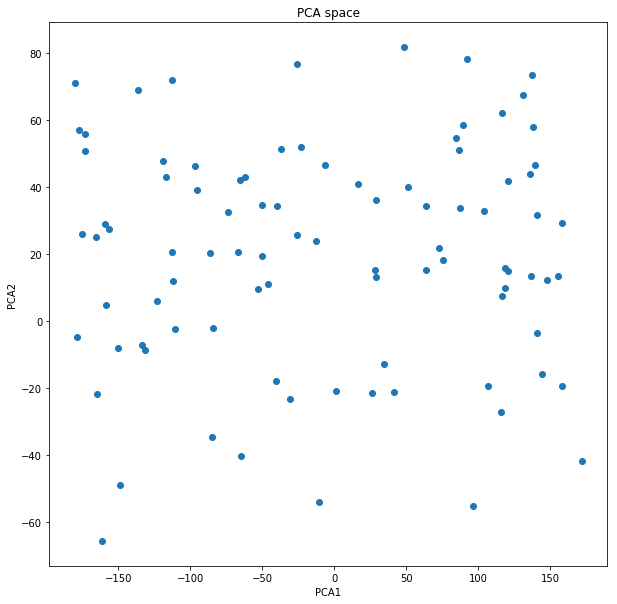

In [17]:
plt.figure(figsize= (10, 10))
plt.scatter(Z[:, 0],Z[:, 1] )
plt.title('PCA space');
plt.xlabel('PCA1');
plt.ylabel('PCA2');

In [18]:
x_r = np.dot(Z, U[:, :2].T)

In [19]:
x_r[21]

array([ -11.42350001, -112.05891182,    7.71413161,   -0.54838166,
          2.02690914,    1.56181436,   -0.7924843 ])

In [20]:
loc_eig.mean()

Latitude (Deg)                         -6.205495
Longitude (Deg)                        -5.651648
Altitude (km)                          32.449254
Velocity Components (km/s): vx          1.247059
Velocity Components (km/s): vy         -2.631373
Velocity Components (km/s): vz         -1.113725
Calculated Total Impact Energy (kt)     1.581934
dtype: float64